<a href="https://colab.research.google.com/github/art9440/SHIFT/blob/main/simple_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import seaborn as sns

## Данные

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']

## Логистическая регрессия

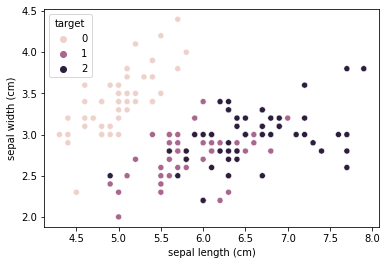

In [ ]:
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['sepal width (cm)'], hue=iris_df['target'])

In [ ]:
train_X = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y = iris_df[iris_df['target'].isin([0, 1])]['target']

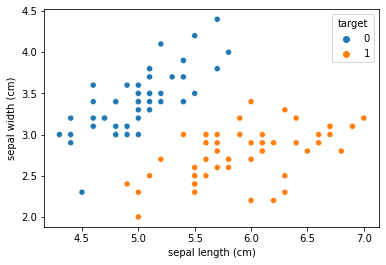

In [ ]:
sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)

Логистическая функция
 $\sigma(z) = \frac{1}{1 + \exp^{-z}}$
Ищем решение в виде  
$f(x,b)=b_0+b_1 x_1+b_2 x_2+...+b_k x_k$  
$y = \sigma(f(x, b))$  

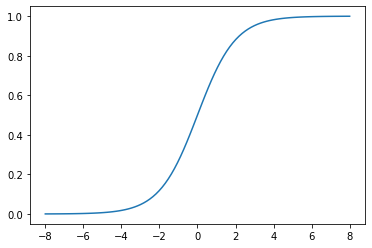

In [ ]:
X = np.linspace(-8, 8, 100)
plt.plot(X, 1/(1+np.exp(-X)))

Оптимизируем логистическую функцию потерь  
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)})$

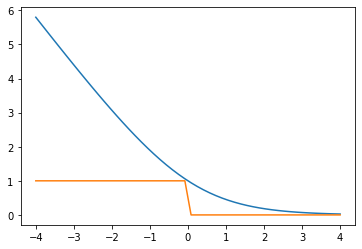

In [ ]:
X = np.linspace(-4, 4)
plt.plot(X, np.log2(1+np.exp(-X)))
plt.plot(X, (-np.sign(X)+1)/2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(train_X, train_y)

LogisticRegression()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


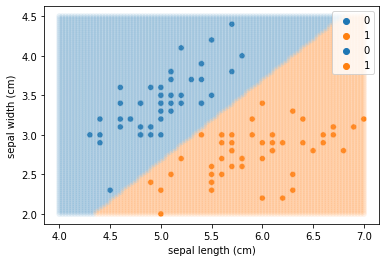

In [ ]:
_x = np.linspace(4, 7, 100)
_y = np.linspace(2, 4.5, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = logreg.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)


## Регуляризация

In [ ]:
train_X = np.linspace(-5, 5, 20).reshape(-1, 1)
train_y = np.hstack([np.zeros(10), np.ones(10)])

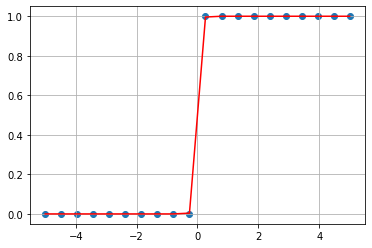

In [ ]:
plt.scatter(train_X, train_y)
logreg = LogisticRegression(C=10000)
logreg.fit(train_X, train_y)
plt.plot(train_X, logreg.predict_proba(train_X)[:,1], c='r')
plt.grid()

[[0.18266487]]
[[0.63505381]]
[[1.46716459]]
[[3.22438331]]
[[7.27839996]]


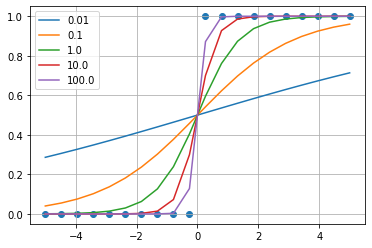

In [ ]:
plt.scatter(train_X, train_y)
plt.grid()
for C in np.logspace(-2, 2, 5):
    logreg = LogisticRegression(C=C)
    logreg.fit(train_X, train_y)
    plt.plot(train_X, logreg.predict_proba(train_X)[:,1], label=C)
    print(logreg.coef_)
plt.legend()

Lasso регуляризатор
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)}) + \sum_{i=1}^n |b_i|$

Ridge регуляризатов
${L} (\textbf X, \textbf{y}, \textbf{b}) = \sum_{i=1}^{\ell} \log (1 + \exp^{-y_i \dot f(x_i, b)}) + \sum_{i=1}^n b_i^2$

### Коррелированные признаки

In [ ]:
train_X_corr = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y_corr = iris_df[iris_df['target'].isin([0, 1])]['target']

In [ ]:
train_X_corr['sepal width (cm) 2'] = train_X_corr['sepal width (cm)']*2

In [ ]:
logreg = LogisticRegression(penalty='l1', C=100000000, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[20.93041684, -9.79856911, -4.49656326]])

In [ ]:
logreg = LogisticRegression(penalty='l1', C=1, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

array([[ 4.0152464 ,  0.        , -3.51594444]])

In [ ]:
logreg = LogisticRegression(penalty='l2', C=1, solver='liblinear')
logreg.fit(train_X_corr, train_y_corr)
logreg.coef_

array([[ 2.8975458 , -1.00713434, -2.01426867]])

## Подготовка признаков для регрессии

### Категориальные признаки
Если у признака только 2 значения, можно их закодировать числами 0 и 1.  
Если больше 2 значений, то использовать one-hot encoding.

In [ ]:
bin_feature = pd.Series(['male', 'male', 'female', 'female', 'female'])

In [ ]:
bin_mapping = {'male': 0, 'female': 1}
bin_feature.map(bin_mapping)

0    0
1    0
2    1
3    1
4    1
dtype: int64

In [ ]:
color = pd.Series(['red', 'red', 'green', 'blue', 'blue', 'red', 'black'])
color

0      red
1      red
2    green
3     blue
4     blue
5      red
6    black
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hot = OneHotEncoder()
color_one_hot = one_hot.fit_transform(color.values.reshape(-1, 1))
color_one_hot

<7x4 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
color_one_hot.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

### Нормирование вещественных признаков

In [ ]:
train_X = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_X['sepal width (mm)'] = train_X['sepal width (cm)'] * 10
train_X.drop(columns=['sepal width (cm)'], inplace=True)

train_y = iris_df[iris_df['target'].isin([0, 1])]['target']

In [ ]:
logreg = LogisticRegression(C=0.1)
logreg.fit(train_X, train_y)

LogisticRegression(C=0.1)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


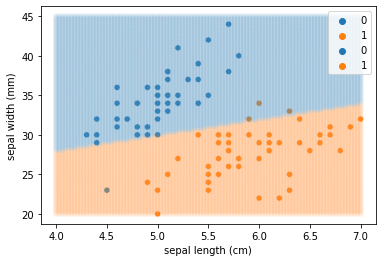

In [ ]:
_x = np.linspace(4, 7, 100)
_y = np.linspace(20, 45, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = logreg.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (mm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)

StandardScaler - приводит значение признаков к среднему и нормирует на стандартное отклонение  
$X_i = \frac{x_i - mean(x)}{std(x)}$

In [ ]:
train_X.agg(['mean', 'std'])

,sepal length (cm),sepal width (mm)
mean,5.471000,30.990000
std,0.641698,4.787389


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
pd.DataFrame(train_X_scaled, columns=['sepal length (cm)', 'sepal width (mm)']).agg(['mean', 'std'])

,sepal length (cm),sepal width (mm)
mean,-1.518230e-15,3.474998e-16
std,1.005038e+00,1.005038e+00


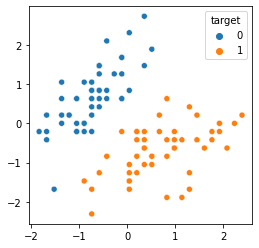

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(x=train_X_scaled[:,0], y=train_X_scaled[:,1], hue=train_y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=0.1))])

In [ ]:
pipeline.fit(train_X, train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=0.1))])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


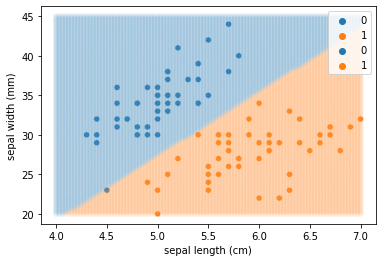

In [ ]:
_pred = pipeline.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (mm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)

### Комбинирование признаков

In [ ]:
circles_X, circles_y = datasets.make_circles(factor=0.5)
circles_X = pd.DataFrame(circles_X, columns=['x', 'y'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


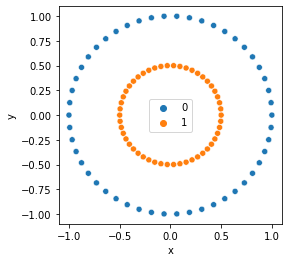

In [ ]:
plt.figure(figsize=(4, 4))
sns.scatterplot(circles_X['x'], circles_X['y'], hue=circles_y)

In [ ]:
def make_polinomial(df):
    df = df.copy()
    df['x_x'] = df['x']**2
    df['y_y'] = df['y']**2
    df['x_y'] = df['x']*df['y']
    return df[['x_x', 'y_y']]

In [ ]:
polinomial_X = make_polinomial(circles_X)

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=100))])
pipeline.fit(polinomial_X, circles_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(C=100))])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


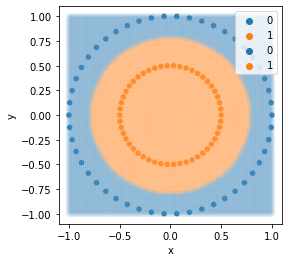

In [ ]:
_x = np.linspace(-1, 1, 100)
_y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(_x, _y)
grid = pd.DataFrame(np.vstack([xv.flatten(), yv.flatten()]).T, columns=['x', 'y'])
polinomial_grid = make_polinomial(grid)
_pred = pipeline.predict(polinomial_grid)

plt.figure(figsize=(4, 4))
sns.scatterplot(circles_X['x'], circles_X['y'], hue=circles_y)
sns.scatterplot(x=grid['x'], y=grid['y'], hue=_pred, alpha=0.1)

## Дерево принятия решений

Дерево решений - это формализация обычного алгоритма принятия решения на основе простых правил. Например:

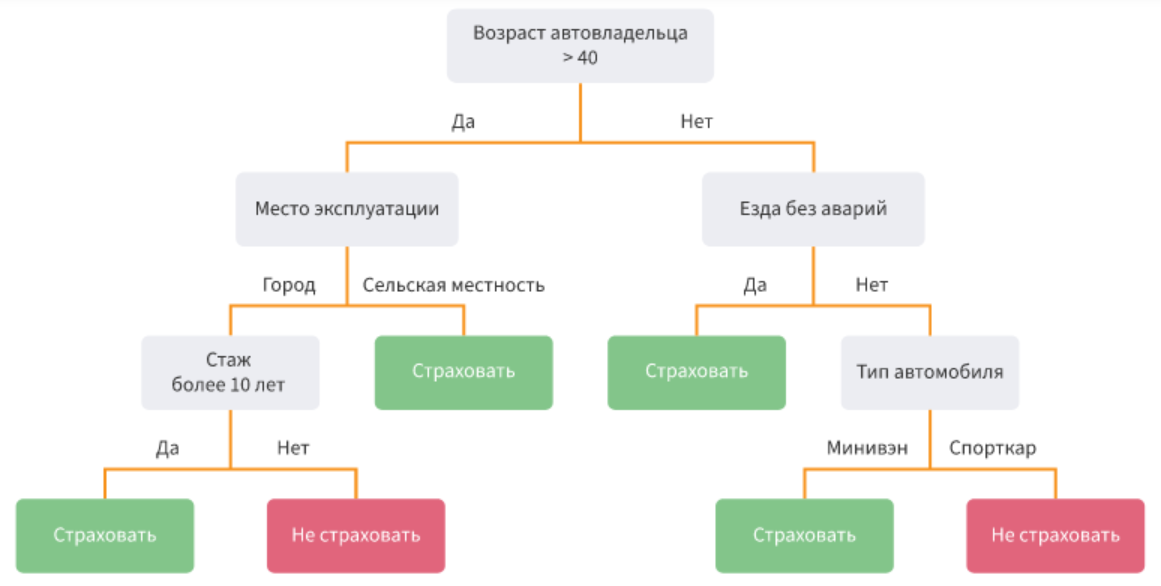

Рекурсивный алгоритм построения дерева:  
Пусть есть некоторая функция $\Large G(Y, Z)$, где $Y$ и $Z$ - любое разбиение некоторой выборки $(X, y)$ на два подмножества. $\Large G$ - критерий качества разбиения. Тогда можем воспользоваться этой функций и рекурсивно построить решающее дерево:

1. Для каждого признака $F_i$ в обучающих данных:
 2. Для каждого значения признака $f^j \in F_i$:
  * Выполняем разбиение обучающей выборки по данному значению на 2 подмножесва. $Y$ - все сэмплы, для которых $F_i < f^j$, $Z$ - для которых $F_i >= f^j$.
  * Для полученного разбиений считаем $\Large G(Y, Z)$ и выбираем разбиение с наименьшим значением.
  * Повторяем операцию 1 для полученных подвыборок $Y, Z$ рекурсивно, пока не выполнен критерий останова.

Оценка качества разбиения:
* Gini impurity = $1 - \sum_{i=1}^n{p_i^2}$, где $p$ - доля объектов, принадлежащих классу $i$.
* Entropy = $-\sum_{i=1}^n{p_i}\log p_i$, где $p$ - доля объектов, принадлежащих классу $i$.

Функции $\Large G(Y, Z)$ - взвешенная сумма выбранной функции по подмножествам:
$\Large G(Y, Z) = \frac{|Y|}{|Y+Z|} Gini(Y) + \frac{|Z|}{|Y+Z|}Gini(Z)$


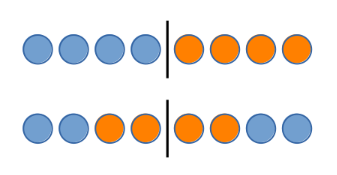

Пример:
1. Идеальная классификация. В Y все объекты класса 0, в Z - класса 1. Тогда gini impurity для классов равна $1 - (1^2 + 0^2) = 0$.  
Следовательно и $\Large G(Y, Z) = 0$.
2. Случайное разбиение. В Y и Z поровну объектов класса 0 и 1. Gini impurity = $1 - (\frac{1}{2}^2 + \frac{1}{2}^2) = \frac{1}{2}$.  
$\Large G(Y, Z) = \frac{4}{8} \frac{1}{2} + \frac{4}{8} \frac{1}{2} = \frac{1}{2}$

In [ ]:
train_X = iris_df[iris_df['target'].isin([0, 1])][['sepal length (cm)', 'sepal width (cm)']]
train_y = iris_df[iris_df['target'].isin([0, 1])]['target']

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)

DecisionTreeClassifier()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


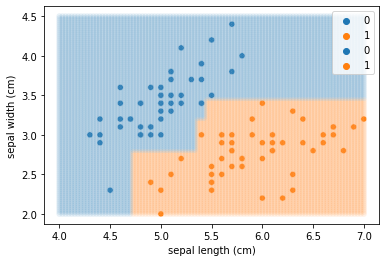

In [ ]:
_x = np.linspace(4, 7, 100)
_y = np.linspace(2, 4.5, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = tree.predict(grid)

sns.scatterplot(x=train_X['sepal length (cm)'], y=train_X['sepal width (cm)'], hue=train_y)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)


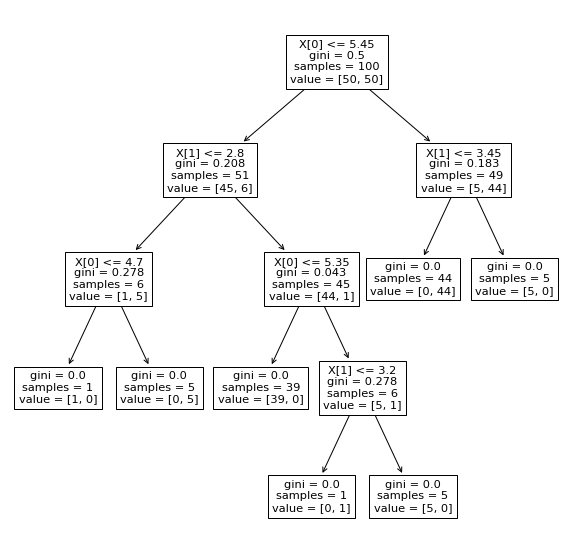

In [ ]:
plt.figure(figsize=(10, 10))
_ = plot_tree(tree)

### Регуляризация решающих деревьев
* max_depth - ограничение максимальной глубины дерева
* min_samples_leaf - минимальное кол-во объектов в листе
* min_samples_split - минимальное кол-во объектов в ноде, чтобы её можно было расщепить

In [ ]:
X = np.linspace(-1, 1, 100)
y = X**2
y += np.random.binomial(1, 0.1, size=100)*np.random.normal(scale=0.5, size=100)

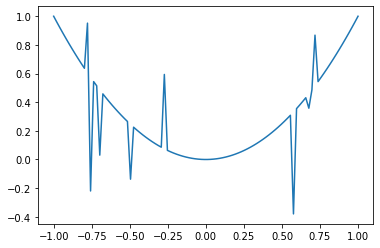

In [ ]:
plt.plot(X, y)

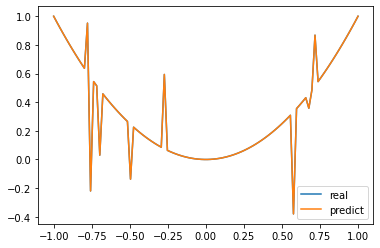

In [ ]:
regtree = DecisionTreeRegressor()
regtree.fit(X.reshape(-1, 1), y)
pred_y = regtree.predict(X.reshape(-1, 1))
plt.plot(X, y, label='real')
plt.plot(X, pred_y, label='predict')
plt.legend()

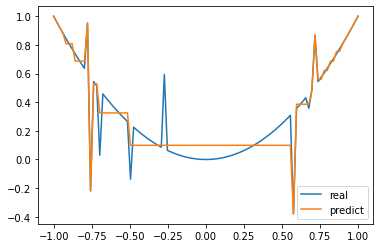

In [ ]:
regtree = DecisionTreeRegressor(max_depth=5)
regtree.fit(X.reshape(-1, 1), y)
pred_y = regtree.predict(X.reshape(-1, 1))
plt.plot(X, y, label='real')
plt.plot(X, pred_y, label='predict')
plt.legend()

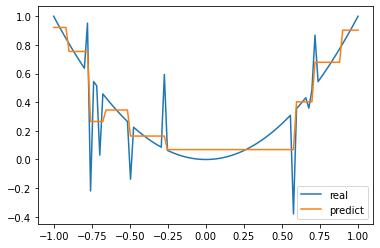

In [ ]:
regtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
regtree.fit(X.reshape(-1, 1), y)
pred_y = regtree.predict(X.reshape(-1, 1))
plt.plot(X, y, label='real')
plt.plot(X, pred_y, label='predict')
plt.legend()